# Scrapping WFP's website 

In [142]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import os as o
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



###  Links of country page  where WFP works

In [2]:
wfp_html_text = requests.get('https://www.wfp.org/countries').text 
soup = BeautifulSoup(wfp_html_text,'lxml')
work_places = soup.find_all('div',class_ = 'where-we-work--item where-we-work--country--content')
country_links=list()
for link in work_places:
    country_links.append(link.a['href'])
# print(country_links)



### Checking the top core domains that WFP works on 

In [3]:
country_problem_domain_list=[]
for link in country_links:
    country_page = BeautifulSoup(requests.get(link, {}).text,"lxml")
    country_problem_domain_text = country_page.find_all('div', class_ = 'stat--body')
    for domain in country_problem_domain_text:
        country_problem_domain_list.append(domain.text.replace('\n', '').replace(',)', '').strip())
#     country_problem_domain_list.append(country_problem_domain_text.find_all)
    
 

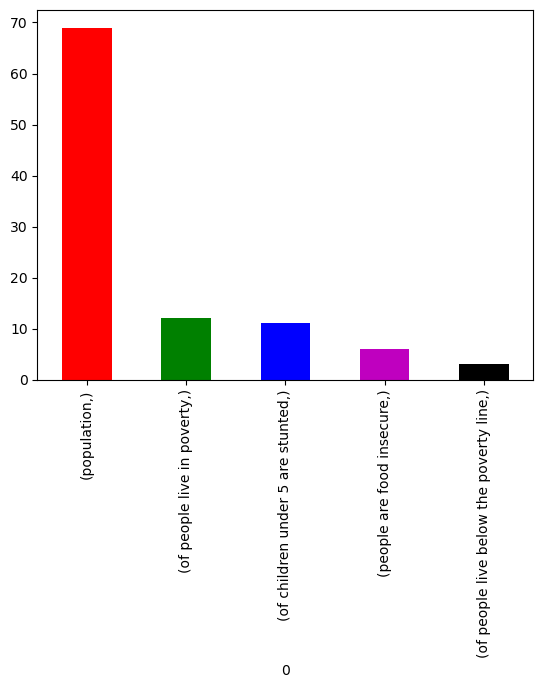

In [229]:
country_problem_domain_list
domainfrequency = (pd.DataFrame(country_problem_domain_list)).value_counts()[:5]
plt.rcdefaults()
plt.plot()
domainfrequency.plot(kind='bar',color = list('rgbmkyc'));


In [5]:
core_domain_lst=['population','of people live in poverty', 'of children under 5 are stunted','people are food insecure',
               'of people live below the poverty line']

## Scrapping all the data

In [226]:
domain_name=[]
domain_value=[]
table=[]
population, people_in_proverty, stunted_children, people_in_food_insecurity,people_under_proverty = ({} for i in range(5))

for link in country_links:
    temp_table=[]
    templist={}   
    country_page = BeautifulSoup(requests.get(link, {}).text,"lxml")
    country_name=country_page.find('h1',class_='fs2 fs1-md fs-headline-lg lh-heading ma0').text
    country_details=country_page.find('div',class_='field-rich-text--container mv4 mv5-lg').text.replace('\n', '')[:-9]
    country_projects=country_page.find('span',class_="card--title db lh-heading fs5 fs4-md").text.strip()
## Saving the files to directory
    current_directory = o.getcwd()
    folder = o.path.join(current_directory, country_name)
    file_name = f"{country_name}'s details.txt"
    file_name_2 = f"{country_name}'s project.txt"

    file = o.path.join(folder, file_name)
    file_2 = o.path.join(folder, file_name_2)
    o.makedirs(folder)
    with open(file, 'w',encoding='utf-8') as f:
        f.write(country_details)
        f.close()
    with open(file_2, 'w',encoding='utf-8') as f2:
        f2.write(country_projects)
        f2.close()
    country_domain_details=country_page.find_all('div',class_='stat--item tl-lg tc')
    
    templist["country_name"]= country_name
    templist["country_details"] = (f"{current_directory}\\{country_name}\\{country_name}'s details.txt")
    templist["country_projects"] = (f"{current_directory}\\{country_name}\\{country_name}'s project.txt")
    templist["population"]=templist["people_in_proverty"]=templist["stunted_children"]=templist["people_in_food_insecurity"]=templist["people_under_proverty"]=""

    for cdd in country_domain_details:
        name= cdd.find('div',class_='stat--body').text.replace('\n', '').replace(',)', '').strip()
        domain_value= cdd.find('div',class_='fs3 mb2 bold').text.strip()

        if name == core_domain_lst[0]:
            if "million" in domain_value:
                new_domain_value=(float(domain_value[:-7].strip().replace('Over ', '').replace(" million","")))*100000
            elif "billion" in domain_value:
                new_domain_value=(float(domain_value[:-7]))*100000000
            elif "million" or "billion" not in domain_value:
                new_domain_value=float(domain_value.replace(',', ''))
            
            population[country_name]=new_domain_value
            templist["population"]=new_domain_value
            
        elif name == core_domain_lst[1]:
            if "%" in domain_value:
                new_domain_value=float(domain_value.replace("More than ","").replace("%",""))/100
            people_in_proverty[country_name]=new_domain_value
            templist["people_in_proverty"]=new_domain_value
            
        elif name == core_domain_lst[2]:
            if "%" in domain_value:
                new_domain_value=float(domain_value.replace("%",""))/100
            stunted_children[country_name]= new_domain_value
            templist["stunted_children"]=new_domain_value
            
        elif name == core_domain_lst[3]:
            if "million" in domain_value:
                new_domain_value=(float(domain_value[:-7].strip().replace(' million ', '').replace("million","")))*100000
                people_in_food_insecurity[country_name]= new_domain_value
            elif "," in domain_value:
                pass
            templist["people_in_food_insecurity"]=new_domain_value
            
        elif name == core_domain_lst[4]:
            if "%" in domain_value:
                new_domain_value=float(domain_value.replace("%",""))/100
            people_under_proverty[country_name]= new_domain_value
            templist["people_under_proverty"]=new_domain_value
                
    table.append(templist)
                       

In [ ]:
# columns =["Country Name", "country_details","population", "people_in_proverty", "stunted_children", "people_in_food_insecurity","people_under_proverty" ]
# # table_dict = {columns[idx] : table[idx] for idx,val in enumerate(table) }
# def make_clickable(val):
#     return '<a href="{}">{}</a>'.format(val,val)

In [228]:
def link(path):
    url = o.path.basename(path)
    return '<a href="{}">{}</a>'.format(path, url)
def link2(path):
    url = o.path.basename(path)
    return '<a href="{}">{}</a>'.format(path, url)


df = pd.DataFrame(data=table)
df.to_csv("wfp_programs.csv")
df.style.format({'country_projects': link})

df.style.format({'country_details': link})





,country_name,country_details,country_projects,population,people_in_proverty,stunted_children,people_in_food_insecurity,people_under_proverty
0,Afghanistan,Afghanistan's details.txt,C:\Users\Mubtasim Fuad\Documents\Afghanistan\Afghanistan's project.txt,3570000.000000,,0.410000,,
1,Algeria,Algeria's details.txt,C:\Users\Mubtasim Fuad\Documents\Algeria\Algeria's project.txt,,,,,
2,Angola,Angola's details.txt,C:\Users\Mubtasim Fuad\Documents\Angola\Angola's project.txt,,,,,
3,Armenia,Armenia's details.txt,C:\Users\Mubtasim Fuad\Documents\Armenia\Armenia's project.txt,300000.000000,0.264000,,,
4,Bangladesh,Bangladesh's details.txt,C:\Users\Mubtasim Fuad\Documents\Bangladesh\Bangladesh's project.txt,16000000.000000,,,,
5,Benin,Benin's details.txt,C:\Users\Mubtasim Fuad\Documents\Benin\Benin's project.txt,1120000.000000,,,,
6,Bhutan,Bhutan's details.txt,C:\Users\Mubtasim Fuad\Documents\Bhutan\Bhutan's project.txt,825246.000000,,,,
7,Plurinational State of Bolivia,Plurinational State of Bolivia's details.txt,C:\Users\Mubtasim Fuad\Documents\Plurinational State of Bolivia\Plurinational State of Bolivia's project.txt,1100000.000000,,,,
8,Burkina Faso,Burkina Faso's details.txt,C:\Users\Mubtasim Fuad\Documents\Burkina Faso\Burkina Faso's project.txt,2040000.000000,,,,
9,Burundi,Burundi's details.txt,C:\Users\Mubtasim Fuad\Documents\Burundi\Burundi's project.txt,1170000.000000,0.650000,,,


## <font color='grey'> Countries with highest population <font>

In [220]:
# population_list = list(population)
# population_df = pd.DataFrame(population_list)
population_df= pd.DataFrame([population.keys(), population.values()]).T
population_df.columns= ['Country', 'Population'] 
population_df.sort_values(by=['Population'],ascending=False)

,Country,Population
11,China,137000000.0
29,India,130000000.0
30,Indonesia,25870000.0
49,Pakistan,20770000.0
2,Bangladesh,16000000.0
...,...,...
54,São Tomé and Príncipe,215056.0
22,Gambia,210000.0
26,Guinea-Bissau,180000.0
62,Timor-Leste,120000.0


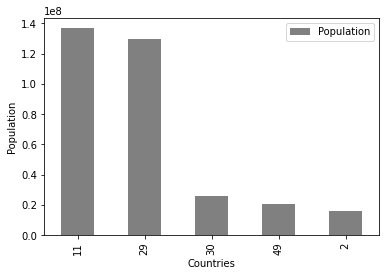

In [225]:
populationfrequency = population_df.sort_values(by=['Population'],ascending=False)[0:5]
populationfrequency.plot(kind='bar',color = 'grey',label=populationfrequency["Country"]);
plt.xlabel('Countries');
plt.ylabel('Population');
 


# Analysis the Datas of Population and Proverty  

## Spliting Data

In [91]:
x = np.array(newdf1["population"]).reshape(-1, 1)
y = np.array(newdf1["people_in_proverty"]).reshape(-1, 1)
x

array([[210000.0],
       [300000.0],
       [459999.99999999994],
       [600000.0],
       [640000.0],
       [900000.0],
       [910000.0],
       [1053000.0],
       [1170000.0],
       [1340000.0],
       [1540000.0],
       [2330000.0]], dtype=object)

## Training the Linear Regression model on the whole dataset

In [178]:
from sklearn.linear_model import LinearRegression
lin_reg_n = LinearRegression()
lin_reg_n.fit(x,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [177]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 7)
x_poly_p = poly_reg.fit_transform(x)

In [175]:
lin_reg_p = LinearRegression()
lin_reg_p.fit(x_poly_p, y)

LinearRegression()

## Visualising the Linear Regression results

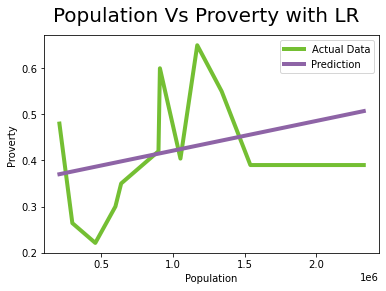

<Figure size 432x288 with 0 Axes>

In [202]:
fig = plt.figure()

plt.plot(x,y,color = np.random.rand(3),linewidth=4)
plt.plot(x , lin_reg_n.predict(x),color = np.random.rand(3),linewidth=4)
fig.suptitle('Population Vs Proverty with LR', fontsize=20)
plt.xlabel('Population')
plt.ylabel('Proverty')
plt.legend(['Actual Data', 'Prediction'])
plt.savefig('Population Vs Proverty with LR.png')

plt.show()



## Linear regression didn't work 😢
## Let's Try Polynomial Regression Model on it

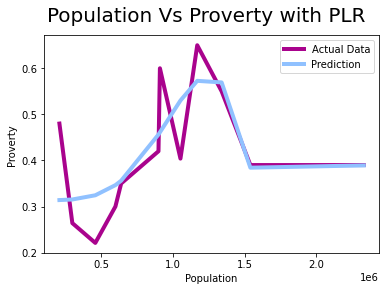

<Figure size 432x288 with 0 Axes>

In [205]:
fig = plt.figure()
plt.plot(x,y, color = np.random.rand(3),linewidth=4)
plt.plot(x, lin_reg_p.predict(x_poly_p),color = np.random.rand(3),linewidth=4)
fig.suptitle('Population Vs Proverty with PLR', fontsize=20)
plt.xlabel('Population')
plt.ylabel('Proverty')
plt.legend(['Actual Data', 'Prediction'])
plt.savefig('Population Vs Proverty with PLR.png')

plt.show()




## Linear regression didn't work 😢
## Let's Try Polynomial Regression Model on it

In [125]:
newdf =  df[(df.iloc[:, [3,5] ] != "").all(axis=1)]

newdf = newdf[["country_name", "population", "stunted_children"]]

newdf= newdf.sort_values('stunted_children')
newdf= newdf.sort_values('population')


newdf


,country_name,population,stunted_children
10,Cambodia,1600000.0,0.32
30,Guatemala,1630000.0,0.465
49,Mali,1910000.0,0.304
51,Mozambique,2800000.0,0.423
54,Nepal,2850000.0,0.36
0,Afghanistan,3570000.0,0.41
79,Uganda,3900000.0,0.29
72,Tanzania,5590000.0,0.34
58,Pakistan,20770000.0,0.44
36,Indonesia,25870000.0,0.372


## Applying Linear Regression model 

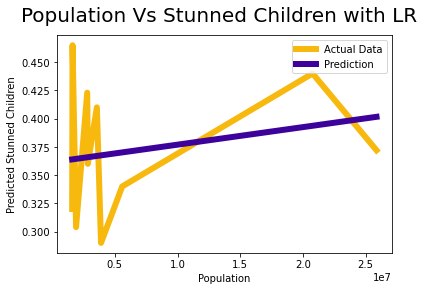

<Figure size 432x288 with 0 Axes>

In [209]:
x_new = np.array(newdf["population"]).reshape(-1, 1)
y_new = np.array(newdf["stunted_children"]).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_new,y_new)
fig = plt.figure()
plt.plot(x_new,y_new, color = np.random.rand(3), linewidth = 6)
plt.plot(x_new, lin_reg.predict(x_new),color = np.random.rand(3), linewidth = 6)
fig.suptitle('Population Vs Stunned Children with LR', fontsize=20)
plt.xlabel('Population')
plt.ylabel('Predicted Stunned Children')
plt.legend(['Actual Data', 'Prediction'])
plt.savefig('Population Vs Stunned Children with LR.png')

plt.show()



## <font color='red'>Linear regression didn't work again </font> 😢
## <font color='Green'>Let's Try Polynomial Regression Model on it.</font> 

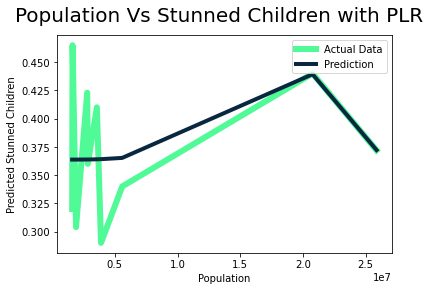

In [215]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x_new)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_new)
fig = plt.figure()
plt.plot(x_new,y_new,color = np.random.rand(3), linewidth = 6)
plt.plot(x_new , lin_reg_2.predict(x_poly), color = np.random.rand(3), linewidth = 4)
fig.suptitle('Population Vs Stunned Children with PLR', fontsize=20)
plt.xlabel('Population')
plt.ylabel('Predicted Stunned Children')
plt.legend(['Actual Data', 'Prediction'])
plt.savefig('Population Vs Stunned Children with PLR.png')

plt.show()




## <font color='grey'>~Mubtasim Fuad</font>  